[*********************100%***********************]  1 of 1 completed


Veri Başlığı (İlk 5 Satır):
Price        Date      Close
Ticker                  AAPL
0      2019-01-02  37.575207
1      2019-01-03  33.832443
2      2019-01-04  35.276730
3      2019-01-07  35.198208
4      2019-01-08  35.869190


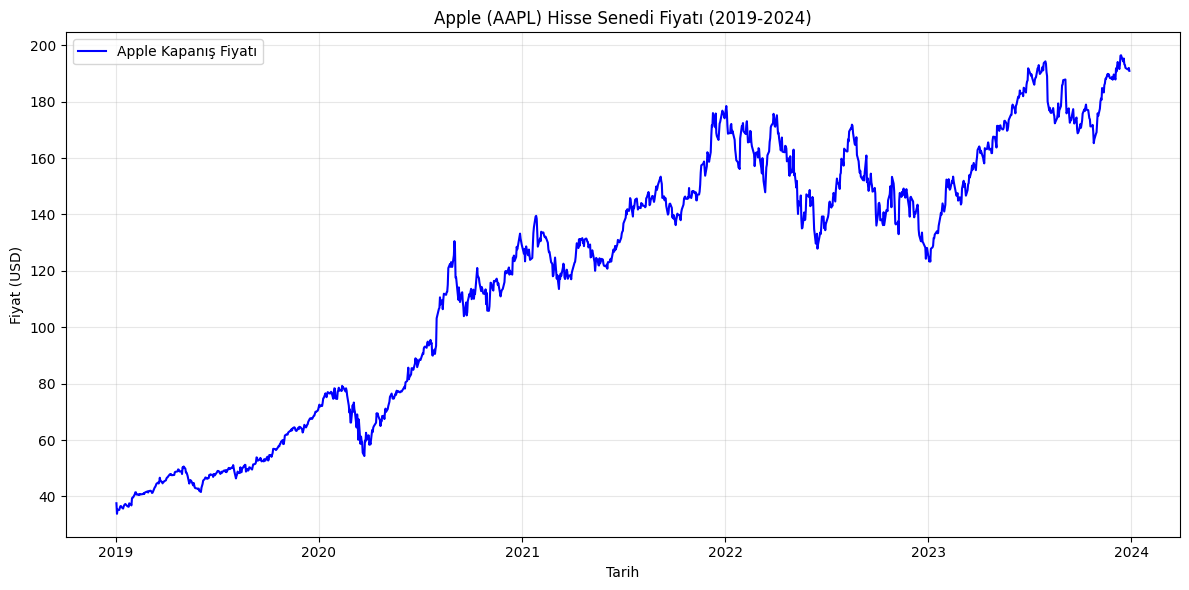

Orijinal fiyat aralığı: 33.83 - 196.45 USD
Normalleştirilmiş aralık: 0.00 - 1.00
Toplam örnek sayısı: 1198
Bir örnek (X[0]): [0.02301619 0.         0.00888167 0.00839879 0.01252501]... (ilk 5 değer)
Hedef (y[0]): 0.0711
Eğitim örnek sayısı: 958
Test örnek sayısı: 240

🚀 LSTM Modeli Eğitiliyor...
Eğitim Başlıyor...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.2023 - val_loss: 0.0513
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0013 - val_loss: 0.0020
Epoc

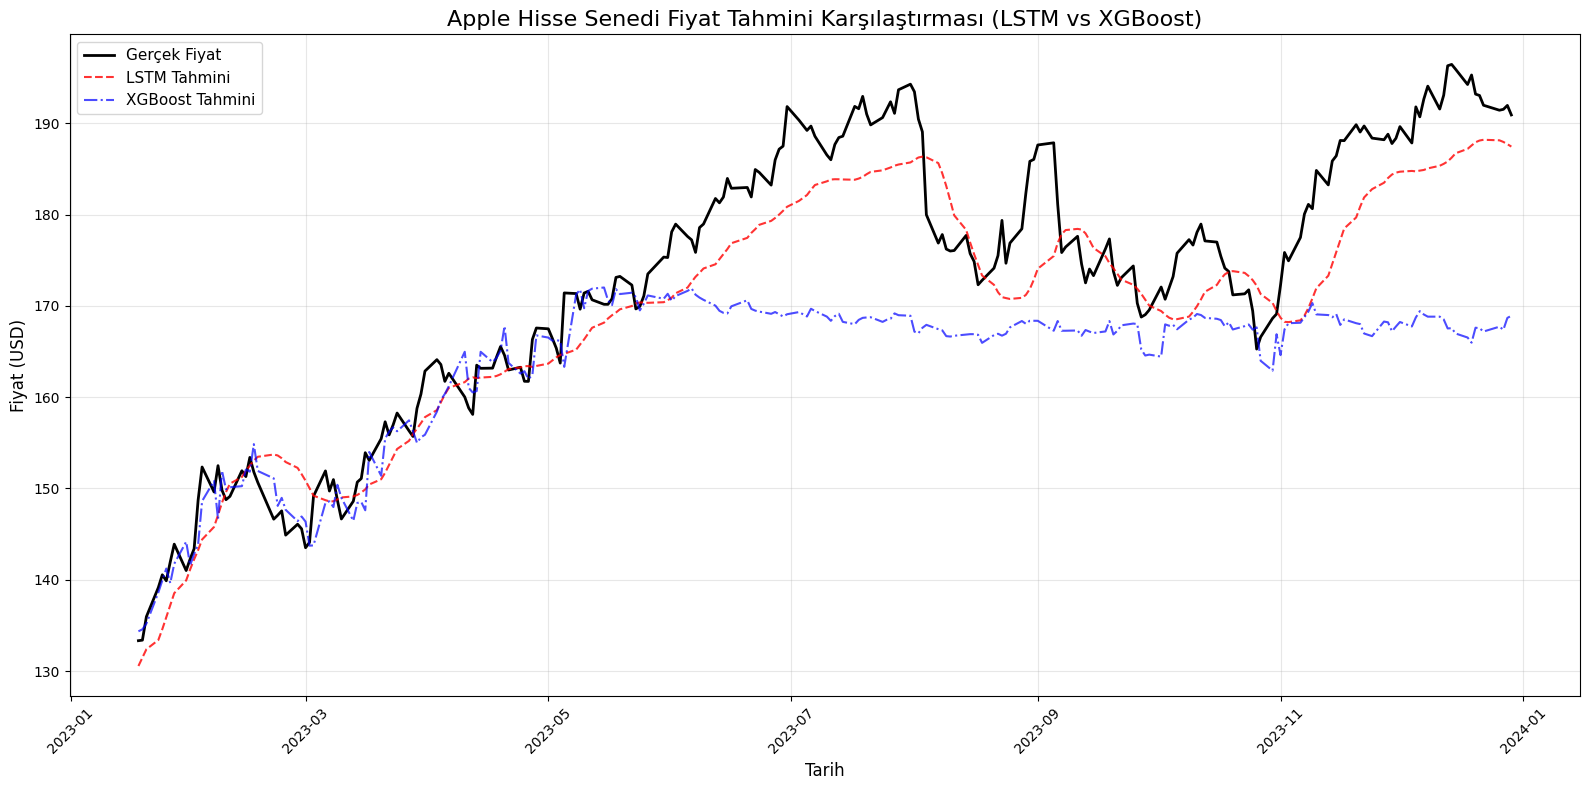


📊 MODEL PERFORMANS KARŞILAŞTIRMASI
LSTM - MAE: 4.65 USD, RMSE: 5.56 USD
XGBoost - MAE: 9.49 USD, RMSE: 12.69 USD

🏆 SONUÇ:
✅ LSTM, XGBoost'a göre daha düşük hata ile tahmin yaptı.
📌 LSTM, zaman serisi verisindeki sıralı yapıyı daha iyi öğrendi.

🔍 Model Bilgileri:
- Zaman penceresi: 60 gün
- Eğitim/Test oranı: %80 / %20
- LSTM: 2 katmanlı, 50+50 nöron
- XGBoost: 100 ağaç, max derinlik=6
- Metrik: RMSE ve MAE
Bu model eğitim amaçlıdır. Gerçek yatırım için kullanılmamalıdır.


In [3]:
# -------------------------------------------------------------------------
# 📌 PROJE: Apple (AAPL) Hisse Senedi Fiyat Tahmini
# 🛠  KULLANILAN MODELLER: LSTM (Derin Öğrenme) ve XGBoost (Makine Öğrenmesi)
# 📅 VERİ ARALIĞI: 2019-2024
# 🧠 AMAÇ: Geçmiş fiyatları kullanarak gelecekteki fiyatları tahmin etmek
# -------------------------------------------------------------------------
# Bu notebook, her adımı detaylıca açıklayarak hem öğrenmeye hem de uygulamaya odaklanır.
# Her satırın altında veya yanında neden yapıldığı anlatılmıştır.

# -----------------------------
# 1. GEREKLİ KÜTÜPHANELERİ YÜKLE
# -----------------------------
# Google Colab'de bazı kütüphaneler önceden yüklü olsa da, emin olmak için tekrar yüklüyoruz.
# Eğer yerel bilgisayarda çalışıyorsan, bu komutlar pip ile paketleri kurar.

!pip install yfinance xgboost scikit-learn matplotlib pandas numpy tensorflow

# Şimdi, kullanacağımız tüm kütüphaneleri içeri aktarıyoruz:
import yfinance as yf           # Hisse senedi verisi çekmek için (Yahoo Finance API)
import pandas as pd             # Veri işleme (tablo işlemleri)
import numpy as np              # Sayısal işlemler (diziler, matematik)
import matplotlib.pyplot as plt # Grafik çizimi
from sklearn.preprocessing import MinMaxScaler  # Veriyi 0-1 arasına sıkıştırmak için
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Model doğruluğu ölçmek için
from tensorflow.keras.models import Sequential   # LSTM modeli oluşturmak için
from tensorflow.keras.layers import LSTM, Dense # LSTM ve çıkış katmanları
from tensorflow.keras.optimizers import Adam    # Modeli daha hızlı eğitmek için optimizatör
from xgboost import XGBRegressor                # XGBoost regresyon modeli
import warnings
warnings.filterwarnings("ignore")  # Uyarıları sessize al (gözü karıştırmasın)

# -------------------------------------------------------------------------
# 2. VERİYİ İNDİR VE TEMEL BAKIŞ
# -------------------------------------------------------------------------
# Apple hisse senedini (AAPL) 2019'dan 2024'e kadar indiriyoruz
ticker = "AAPL"
data = yf.download(ticker, start="2019-01-01", end="2024-01-01")

# 'Close' (kapanış fiyatı) sütununu alıyoruz çünkü en çok kullanılan fiyattır
df = data[['Close']].copy()  # Sadece kapanış fiyatını al, orijinal veriyi bozma
df.reset_index(inplace=True)  # Tarih sütununu düzgün hale getir (index'ten çıkar)

# Verinin ilk 5 satırını göster (nasıl göründüğüne bakalım)
print("Veri Başlığı (İlk 5 Satır):")
print(df.head())

# -------------------------------------------------------------------------
# 3. VERİYİ GÖRSELLEŞTİR: FİYAT TRENDİ NASIL?
# -------------------------------------------------------------------------
# Fiyatın zaman içinde nasıl değiştiğini görmek çok önemli
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Apple Kapanış Fiyatı', color='blue')
plt.title('Apple (AAPL) Hisse Senedi Fiyatı (2019-2024)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()  # Açıklama kutusu ekle
plt.grid(True, alpha=0.3)  # Hafif ızgara çizgileri
plt.tight_layout()  # Grafiği düzgün hale getir
plt.show()

# -------------------------------------------------------------------------
# 4. VERİ ÖN İŞLEME: NORMALİZASYON (0-1 Aralığına Sıkıştırma)
# -------------------------------------------------------------------------
# LSTM, büyük sayılarla iyi çalışamaz. Bu yüzden fiyatları 0 ile 1 arasına sıkıştırıyoruz.
# Bu işlem, modelin daha hızlı ve doğru öğrenmesini sağlar.

scaler = MinMaxScaler(feature_range=(0, 1))  # 0-1 arası ölçekleme
# .values.reshape(-1, 1): Pandas sütununu numpy dizisine çevir (LSTM için gerekli)
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Access the scalar values using .item() before formatting
print(f"Orijinal fiyat aralığı: {df['Close'].min().item():.2f} - {df['Close'].max().item():.2f} USD")
print(f"Normalleştirilmiş aralık: {scaled_data.min():.2f} - {scaled_data.max():.2f}")

# -------------------------------------------------------------------------
# 5. ZAMAN PENCERESİYLE VERİYİ HAZIRLA (X ve y)
# -------------------------------------------------------------------------
# Zaman serisi tahmininde "geçmiş N gün → gelecek 1 gün" mantığı kullanılır.
# Bu fonksiyon, veriyi bu yapıya dönüştürür.

def create_sequences(data, seq_length):
    """
    Veriyi LSTM ve XGBoost için uygun hale getirir.
    seq_length: Kaç gün önceki verileri kullanarak tahmin yapacağız?
    Örnek: seq_length=60 → Son 60 gün verilir, 61. gün tahmin edilir.

    data: Normalleştirilmiş fiyat dizisi (örneğin: [0.12, 0.13, ..., 0.95])
    seq_length: Pencere boyutu (kaç gün geçmiş?)
    """
    X, y = [], []  # Giriş (X) ve hedef (y) listeleri
    for i in range(seq_length, len(data)):
        # X: Son seq_length kadar veri (örneğin 60 gün)
        X.append(data[i - seq_length:i, 0])
        # y: Tahmin edilecek gün (bir sonraki gün)
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# 60 gün geçmiş kullanarak tahmin yapacağız
SEQ_LENGTH = 60
X, y = create_sequences(scaled_data, SEQ_LENGTH)

print(f"Toplam örnek sayısı: {len(X)}")
print(f"Bir örnek (X[0]): {X[0][:5]}... (ilk 5 değer)")  # İlk 5 değeri göster
print(f"Hedef (y[0]): {y[0]:.4f}")

# -------------------------------------------------------------------------
# 6. EĞİTİM VE TEST VERİSİNE AYIR
# -------------------------------------------------------------------------
# Verinin %80'i eğitim, %20'si test olacak
split = int(0.8 * len(X))  # Eğitim için ayırma noktası

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Eğitim örnek sayısı: {len(X_train)}")
print(f"Test örnek sayısı: {len(X_test)}")

# LSTM için veri şekli: (örnek sayısı, zaman adımı, özellik sayısı)
# Bizim verimizde özellik sayısı = 1 (sadece kapanış fiyatı)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# XGBoost için 2D veri yeterli: (örnek sayısı, özellik sayısı)
X_train_xgb = X_train  # 2D olduğu için reshaping gerekmez
X_test_xgb = X_test

# -------------------------------------------------------------------------
# 7. LSTM MODELİ OLUŞTUR VE EĞİT
# -------------------------------------------------------------------------
print("\n🚀 LSTM Modeli Eğitiliyor...")

# Model sıralı katmanlardan oluşur
model_lstm = Sequential()

# İlk LSTM katmanı: 50 nöron, tüm zaman adımlarında çıkış verir (return_sequences=True)
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))

# İkinci LSTM katmanı: 50 nöron, sadece son adımda çıkış verir
model_lstm.add(LSTM(50, return_sequences=False))

# Tam bağlı (Dense) katman: 25 nöron
model_lstm.add(Dense(25, activation='relu'))

# Çıkış katmanı: 1 değer (tahmin edilen fiyat)
model_lstm.add(Dense(1))

# Modeli derle: Adam optimizatör ve MSE kayıp fonksiyonu kullan
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Modeli eğit
print("Eğitim Başlıyor...")
history = model_lstm.fit(
    X_train_lstm, y_train,
    batch_size=32,           # 32 örneklik gruplar halinde eğit
    epochs=20,               # Tüm veriyi 20 kez kullan
    validation_data=(X_test_lstm, y_test),  # Test verisiyle doğrulama
    verbose=1                # Her epoch'ta bilgi göster
)

# -------------------------------------------------------------------------
# 8. LSTM İLE TAHMİN YAP
# -------------------------------------------------------------------------
# Test verisiyle tahmin yap
y_pred_lstm_scaled = model_lstm.predict(X_test_lstm)

# Tahmini orijinal fiyata çevir (0-1 aralığından USD'ye)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# Gerçek fiyatları da orijinal ölçeğe çevir
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# -------------------------------------------------------------------------
# 9. XGBOOST MODELİ OLUŞTUR VE EĞİT
# -------------------------------------------------------------------------
print("\n🚀 XGBoost Modeli Eğitiliyor...")

# XGBoost regresyon modeli (çok hızlı ve güçlü bir ağaç modeli)
model_xgb = XGBRegressor(
    n_estimators=100,      # 100 karar ağacı kullan
    max_depth=6,           # Her ağacın maksimum derinliği
    learning_rate=0.1,     # Her adımda ne kadar öğrenileceği
    random_state=42        # Tekrarlanabilirlik için
)

# Modeli eğit (XGBoost otomatik olarak 2D veriyi anlar)
model_xgb.fit(X_train_xgb, y_train)

# Test verisiyle tahmin yap
y_pred_xgb_scaled = model_xgb.predict(X_test_xgb)

# Tahmini orijinal ölçeğe çevir
y_pred_xgb = scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))

# -------------------------------------------------------------------------
# 10. SONUÇLARI GÖRSELLEŞTİR
# -------------------------------------------------------------------------
# Test verisinin tarihlerini al (grafikte x ekseni için)
test_dates = df['Date'].values[split + SEQ_LENGTH:]

# Büyük bir grafik oluştur
plt.figure(figsize=(16, 8))

# Gerçek fiyatları çiz
plt.plot(test_dates, y_test_actual, label='Gerçek Fiyat', color='black', linewidth=2)

# LSTM tahminlerini çiz
plt.plot(test_dates, y_pred_lstm, label='LSTM Tahmini', color='red', alpha=0.8, linestyle='--', linewidth=1.5)

# XGBoost tahminlerini çiz
plt.plot(test_dates, y_pred_xgb, label='XGBoost Tahmini', color='blue', alpha=0.7, linestyle='-.', linewidth=1.5)

# Grafiğe başlık ve etiketler ekle
plt.title('Apple Hisse Senedi Fiyat Tahmini Karşılaştırması (LSTM vs XGBoost)', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Fiyat (USD)', fontsize=12)
plt.legend(fontsize=11)
plt.xticks(rotation=45)  # Tarihleri eğik yaz
plt.grid(True, alpha=0.3)  # Hafif ızgara
plt.tight_layout()  # Boşlukları düzenle
plt.show()

# -------------------------------------------------------------------------
# 11. MODEL PERFORMANSINI KARŞILAŞTIR
# -------------------------------------------------------------------------
def evaluate_model(y_true, y_pred, model_name):
    """
    Modelin performansını MAE ve RMSE ile değerlendir.
    y_true: Gerçek değerler
    y_pred: Tahmin edilen değerler
    model_name: Model adı (LSTM, XGBoost vb.)
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f} USD, RMSE: {rmse:.2f} USD")
    return mae, rmse

print("\n📊 MODEL PERFORMANS KARŞILAŞTIRMASI")
lstm_mae, lstm_rmse = evaluate_model(y_test_actual, y_pred_lstm, "LSTM")
xgb_mae, xgb_rmse = evaluate_model(y_test_actual, y_pred_xgb, "XGBoost")

print("\n🏆 SONUÇ:")
if lstm_rmse < xgb_rmse:
    print("✅ LSTM, XGBoost'a göre daha düşük hata ile tahmin yaptı.")
    print("📌 LSTM, zaman serisi verisindeki sıralı yapıyı daha iyi öğrendi.")
else:
    print("✅ XGBoost, LSTM'e göre daha düşük hata ile tahmin yaptı.")
    print("📌 XGBoost bazen basit ama güçlü olabilir, özellikle küçük veride.")

# -------------------------------------------------------------------------
# 12. EK BİLGİ: MODEL HAKKINDA
# -------------------------------------------------------------------------
print("\n🔍 Model Bilgileri:")
print(f"- Zaman penceresi: {SEQ_LENGTH} gün")
print(f"- Eğitim/Test oranı: %80 / %20")
print(f"- LSTM: 2 katmanlı, 50+50 nöron")
print(f"- XGBoost: 100 ağaç, max derinlik=6")
print(f"- Metrik: RMSE ve MAE")
print("Bu model eğitim amaçlıdır. Gerçek yatırım için kullanılmamalıdır.")